<a href="https://colab.research.google.com/github/sikalovaliza/ml/blob/main/GD_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [38]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [40]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x7A5AF5649340

In [41]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [42]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return w

w = ols_solution(X, y)
print(w)
X_b = np.hstack((np.ones((X.shape[0], 1)), X))
predictions = X_b @ w.T
r2 = r2_score(y, predictions)
print(r2)

[-1.25000000e-01  5.68638657e+01  3.34823720e+01 -2.38518988e-01
  3.96815077e+01 -1.47187101e-01  4.92263515e+01  1.28000000e+02
  1.60000000e+02  7.92038623e+01  4.24712069e+01 -6.40000000e+01]
0.7545141808334817


### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [43]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь
    predictions = X @ w.T
    return predictions

Продублируем функцию для вычисления значения MSE из урока

In [44]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [45]:
# ваш код здесь
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params


### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [54]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    # Добавление столбца единиц к X для учета смещения
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Инициализация параметров
    params = np.random.rand(X.shape[1])  # Должен быть (n+1,)

    m = X.shape[0]  # Количество примеров
    cost_track = np.zeros(iterations)  # Для хранения стоимости на каждой итерации

    for i in range(iterations):
        # Выберите случайный индекс
        j = random.randint(0, m - 1)

        # Обновите параметры с помощью градиентного спуска
        error = (X[j] @ params) - y[j]  # Скалярная ошибка
        params -= learning_rate * error * X[j]  # Обновление параметров

        # Сохранение стоимости для каждого шага
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params


- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [63]:
# **План**

# 1 - находим веса одним из методов
#cost_track_sgd, w_sgd = stochastic_gradient_descent(X, y, 0.01, 10000)
cost_track_gd, w_gd = gradient_descent(X, y, 0.01, 10000)

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)
prediction_gd=prediction(X, w_gd)
#prediction_sgd=prediction(X, w_sgd)
# 3 - вычисляем значение метрики r2
r2_gd = r2_score(y, prediction_gd)
#r2_sgd = r2_score(y, prediction_sgd)
print(r2_gd)
#print(r2_sgd)

0.7554626185750483


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# your code for OLS here


## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [ ]:
# your code for GD here


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

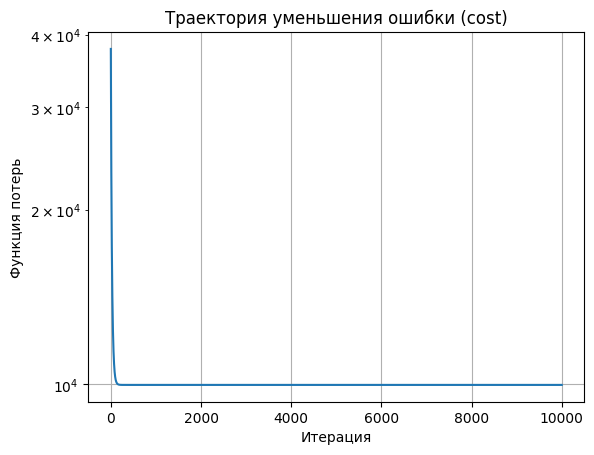

Функция потерь на последних итерациях: 9982.2035


In [65]:
# your code here
import matplotlib.pyplot as plt

plt.plot(cost_track_gd)
plt.title('Траектория уменьшения ошибки (cost)')
plt.xlabel('Итерация')
plt.ylabel('Функция потерь')
plt.yscale('log')
plt.grid()
plt.show()

last_loss = cost_track_gd[-1, -1]
print(f'Функция потерь на последних итерациях: {last_loss:.4f}')

In [ ]:
# your code for SGD here


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [82]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [70]:
# ваш код здесь (Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2=r2_score(y_test, y_pred)
print(r2)

0.6078944086580236


## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [84]:
# ваш код здесь (SGD Regressor)
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2=r2_score(y_test, y_pred)
print(r2)

-1.0084214825543484e+29


## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.